In [1]:
#import all the packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_name= "1_GP.xlsx"
df= pd.read_excel(file_name)


In [3]:
def train_model(file_name):

    #Concatenate dataframes across columns for features (X)
    X= df[['Precipitation', 'Airtemp']]  # Features

    #Use the entire SWE sheet as the target variable (y)
    y=df['swe'].values.reshape(-1,1)  # Target, reshape to 2D array

    #Handle missing values in X with mean imputation
    imputer_X = SimpleImputer(strategy= 'mean')
    X_imputed = imputer_X.fit_transform(X)

    #Handle missing values in y with mean imputation
    imputer_y = SimpleImputer(strategy='mean')
    y_imputed =  imputer_y.fit_transform(y)

    #Ensure x and y have same number of samples
    min_samples = min(len(X_imputed), len(y_imputed))
    X_imputed = X_imputed[:min_samples]
    y_imputed = y_imputed[:min_samples]

    return X_imputed, y_imputed

In [4]:
X, y = train_model(file_name)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
#Train the model
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

#Ensure y_test and y_pred are 1-dimensional arrays
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

#Calculate mean squared error
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f"Mean squaerd error for all files: {mse}")


c:\Users\pkaur\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squaerd error for all files: 1.489572609971631


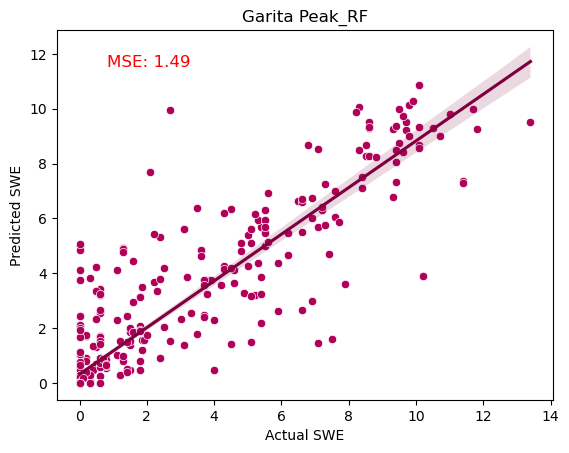

In [8]:
plot_data = pd.DataFrame({'Actual SWE': y_test_flat, 'Predicted SWE': y_pred_flat})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE', color= "#b10059")

sns.regplot(data=plot_data, x='Actual SWE', y='Predicted SWE', scatter=False, color='#7e003f')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title('Garita Peak_RF')
plt.savefig('GP_RF.png', dpi=1200)